## Double spring

This notebook lets you experiment with the double spring setup from class. In particular you can look for the effects of different spring constants and masses, and different initial conditions. 

Exercise. 
Try the code out for the following:
 1. Compare the numerical and analytical solutions for $m=1$, $k=2$, $x_1(0)=-\frac{2}{3}$, $x_2(0)=\frac{1}{4}$.
 2. Modify the code to consider different springs and masses. In particular, characterise what happens for: $k_1\ne k_2\ne k_3$, and/or $L_1\ne L_2 \ne L_3$, and/or $m_1\ne m_2$.
 3. Predict what happens for $k_3 \to 0~$. Modify the code to simulate this physical case.

In [1]:
#Reference scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html
%run ./.setup.ipynb
%matplotlib notebook


Setup complete


In [2]:
def dydt(y,t,k,m):
    """
    ODE system two identical springs anchored: t argument required but not used
    """
    om2=k/m
    f = [y[1],
         -2*om2*y[0] +om2*y[2],
         y[3],
         -2*om2*y[2] +om2*y[0]]
    
    return f

In [3]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

m=1
k=2


leftx=0.0 #Anchor positions
rightx=3.0
lnat=1 #spring natural lengths
#solve for equilibrium positions of masses
xpeq1=rightx/3.
xpeq2=2.*rightx/3.

y0=np.zeros(4)
y0[0] = -2./3 # initial displacement of mass 1 from system equilibrium position
y0[1] = 0.0 # initial velocity of mass 1
y0[2] = 1./4 # initial displacement of mass 2 from system equilibrium position
y0[3] = 0.0 # initial velocity of mass 1

y1=np.zeros(4)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 500


t,dt=np.linspace(0,stoptime,numpoints,retstep=True)


# Call the ODE solver.
y1 = odeint(dydt, y0, t, args=(k,m,),
              atol=abserr, rtol=relerr)


<IPython.core.display.Javascript object>


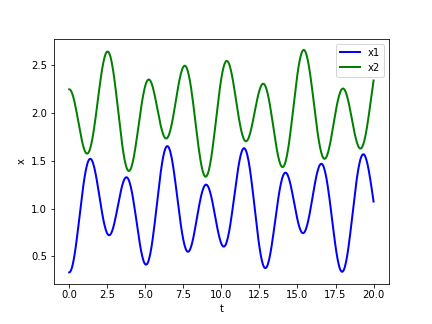

In [4]:
# Plot the solution that was generated: wsol[:,x1,y1,x2,y2]
plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.ylabel('x')
lw = 2

plt.plot(t, xpeq1+y1[:,0], 'b', linewidth=lw,label='x1')
plt.plot(t, xpeq2+y1[:,2], 'g', linewidth=lw,label='x2')
plt.legend();

<IPython.core.display.Javascript object>


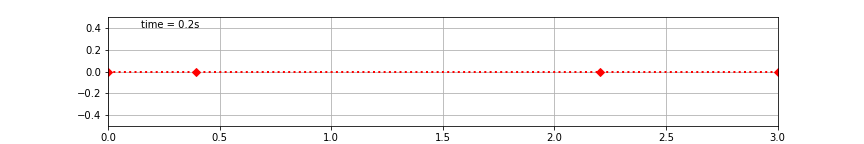

In [5]:
#Adapted from https://matplotlib.org/3.3.0/gallery/animation/double_pendulum.html

import matplotlib.animation as pltani

xp1 = xpeq1+y1[:,0]    # Mass 1 x coordinate
yp1 = 0.0*np.ones_like(xp1) #Mass 1 y coordinate

xp2 = xpeq2+y1[:,2] #Mass 2 x coordinate
yp2 = 0.0*np.ones_like(xp2) #Mass 2 y coordinate

fig = plt.figure(figsize=(12, 2))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(leftx, rightx), ylim=(-0.5, 0.5))
#ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'D:', lw=2,c='r')
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
    thisx = [leftx, xp1[i], xp2[i],rightx]
    thisy = [yp1[i], yp1[i], yp2[i],yp2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = pltani.FuncAnimation(
    fig, animate, len(y1), interval=dt*1000, blit=True)
plt.show()